# New Shows and Movies

## Assignment


Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

You can start by exploring a few questions:

- What type of content is available in different countries?
- How has the number of movies released per year changed over the last 20-30 years?
- Comparison of tv shows vs. movies.
- What is the best time to launch a TV show?
- Analysis of actors/directors of different types of shows/movies.
- Does Netflix has more focus on TV Shows than movies in recent years?
- Understanding what content is available in different countries.


In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

In [178]:
netflix_data = pd.read_csv('/Users/rosiebai/Desktop/python practice/netflix_data.csv')

In [179]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [180]:
netflix_data.shape

(8807, 12)

In [181]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [182]:
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## 1. What type of content is available in different countries?


In [183]:
netflix_data['country'] = netflix_data['country'].str.lstrip(',').str.strip()
pivot_table1 = netflix_data.groupby(['country','type']).show_id.count().reset_index(name = 'num_show_id').sort_values(by = 'num_show_id', ascending=False)
pivot_table1.head(20)

,country,type,num_show_id
683,United States,Movie,2058
282,India,Movie,893
684,United States,TV Show,760
579,United Kingdom,TV Show,213
578,United Kingdom,Movie,206
360,Japan,TV Show,169
497,South Korea,TV Show,159
65,Canada,Movie,122
507,Spain,Movie,97
169,Egypt,Movie,92


In [184]:
pivot_table1.tail(20)

,country,type,num_show_id
352,"Italy, Turkey",Movie,1
377,"Lebanon, Syria",Movie,1
353,"Italy, United Kingdom",TV Show,1
354,"Italy, United Kingdom, France",TV Show,1
356,"Italy, United States",TV Show,1
357,"Italy, United States, Argentina",Movie,1
358,"Jamaica, United States",Movie,1
74,"Canada, Germany, France, United States",Movie,1
73,"Canada, Germany",Movie,1
361,"Japan, Canada",TV Show,1


These two tables show that the top 20 countries and bottom 20 countries in terms of the number of content available. 

## 2. How has the number of movies released per year changed over the last 20-30 years?

In [185]:
pivot_table2 = netflix_data.groupby('release_year')\
    .show_id.count()\
    .reset_index(name = 'num_show_id')\
    .sort_values(by = 'release_year')
pivot_table2

,release_year,num_show_id
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


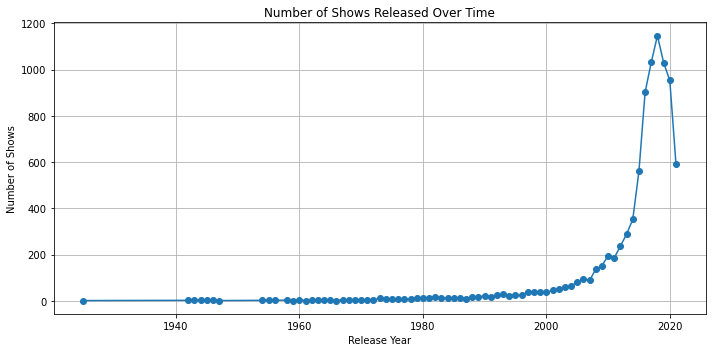

In [186]:
release_year = pivot_table2['release_year'].to_numpy()
num_show_id = pivot_table2['num_show_id'].to_numpy()

plt.figure(figsize=(10, 5))
plt.plot(release_year, num_show_id, marker='o')
plt.title('Number of Shows Released Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.tight_layout()
plt.show()


In [187]:
# from 1990 ~ 2021, the percentage of change in the last 30 years
pct_change_in_last_30yr = round((pivot_table2[pivot_table2['release_year']== 2021]['num_show_id'].values[0] -
                            pivot_table2[pivot_table2['release_year']== 1990]['num_show_id'].values[0])/(pivot_table2[pivot_table2['release_year']== 1990]['num_show_id'].values[0]) * 100.0,2)
print('the number of shows released over the past 30 years has increased',pct_change_in_last_30yr, '%')
# from 2000 ~ 2021
pct_change_in_last_20yr = round((pivot_table2[pivot_table2['release_year']== 2021]['num_show_id'].values[0] -
                            pivot_table2[pivot_table2['release_year']== 2000]['num_show_id'].values[0])/(pivot_table2[pivot_table2['release_year']== 2000]['num_show_id'].values[0]) * 100.0,2)
print('the number of shows released over the past 20 years has increased',pct_change_in_last_20yr, '%')

the number of shows released over the past 30 years has increased 2590.91 %
the number of shows released over the past 20 years has increased 1500.0 %


## 3. Comparison of tv shows vs. movies.

In [188]:
pivot_table3 = netflix_data.groupby(['release_year','type'])\
    .show_id.count()\
    .reset_index(name = 'num_show_id')\
    .sort_values(by = 'release_year')
pivot_table3

,release_year,type,num_show_id
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


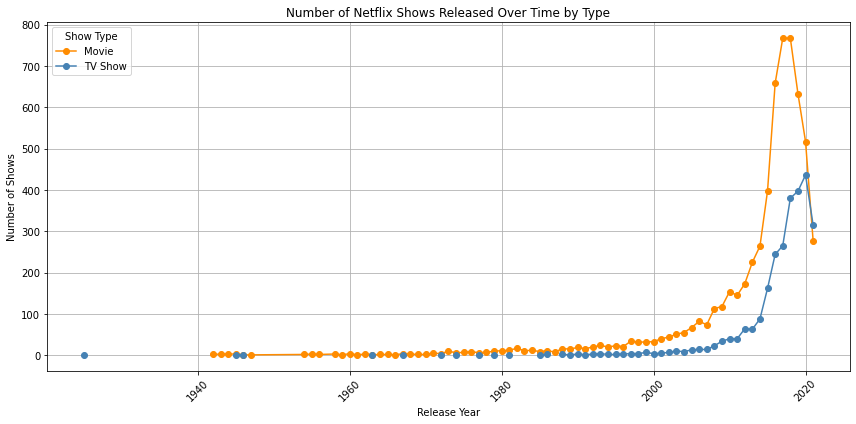

In [189]:
# Step 1: Pivot the data so 'type' becomes column headers
pivot_df = pivot_table3.pivot(index='release_year', columns='type', values='num_show_id')
pivot_df = pivot_df.sort_index()  # Sort years in ascending order

# Step 2: Plot the time series
pivot_df.plot(
    kind='line',
    figsize=(12, 6),
    marker='o',
    color={'Movie': 'darkorange', 'TV Show': 'steelblue'}
)

# Step 3: Format the plot
plt.title('Number of Netflix Shows Released Over Time by Type')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.legend(title='Show Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. What is the best time to launch a TV show?


In [190]:

netflix_data['date_added'] = netflix_data['date_added'].str.strip()
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], format = '%B %d, %Y').dt.strftime('%Y-%m-%d')

In [191]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['release_month'] = netflix_data['date_added'].dt.month

In [192]:
tv_per_month = netflix_data[netflix_data['type'] == 'TV Show'].groupby('release_month').show_id.count().reset_index(name = 'num_show_id').sort_values(by = 'release_month')

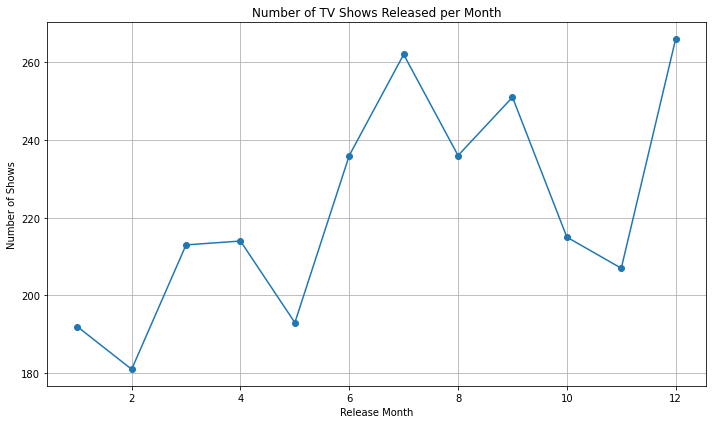

In [193]:
release_month = tv_per_month['release_month'].to_numpy()
num_show_id = tv_per_month['num_show_id'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(release_month, num_show_id, marker='o')
plt.title('Number of TV Shows Released per Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.tight_layout()
plt.show()

December turned out to be the best month to release TV shows and then July.

## 5. Analysis of actors/directors of different types of shows/movies.

In [194]:
# This view reveals which directors frequently work with specific cast members across various types of shows and movies
pivot_table5 = netflix_data.groupby(['listed_in','director','cast']).show_id\
    .count()\
    .reset_index(name = 'num_show_id')\
    .sort_values(by = 'num_show_id', ascending=False)
pivot_table5.head(20)

,listed_in,director,cast,num_show_id
1002,Children & Family Movies,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",11
4896,"Horror Movies, International Movies, Thrillers",Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",4
544,"Action & Adventure, Dramas, International Movies",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty, Taman...",4
5190,Movies,Louis C.K.,Louis C.K.,3
4868,"Horror Movies, International Movies, Thrillers",Ashwin Saravanan,"Taapsee Pannu, Vinodhini, Parvathi T, Ramya Su...",3
545,"Action & Adventure, Dramas, International Movies",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty, Taman...",3
2354,"Comedies, International Movies, Music & Musicals",B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",3
2761,Documentaries,Edward Cotterill,Rachael Stirling,3
5520,Stand-Up Comedy,Walter C. Miller,Sam Kinison,3
5331,Stand-Up Comedy,Jay Karas,Bill Burr,3


In [195]:
# This view reveals which directors frequently produce specific type of shows or movies
pivot_table6 = netflix_data.groupby(['director','listed_in']).show_id\
    .count()\
    .reset_index(name = 'num_show_id')\
    .sort_values(by = 'num_show_id', ascending=False)
pivot_table6.head(20)

,director,listed_in,num_show_id
4130,"Raúl Campos, Jan Suter",Stand-Up Comedy,18
4061,Rajiv Chilaka,Children & Family Movies,18
3088,Marcus Raboy,Stand-Up Comedy,15
2119,Jay Karas,Stand-Up Comedy,13
2115,Jay Chapman,Stand-Up Comedy,11
4633,Shannon Hartman,Stand-Up Comedy,8
2785,Lance Bangs,Stand-Up Comedy,7
4403,S.S. Rajamouli,"Action & Adventure, Dramas, International Movies",7
4396,Ryan Polito,Stand-Up Comedy,7
5169,Troy Miller,Stand-Up Comedy,7


In [196]:
# This view reveals which actor/actress frequently played a role in specific type of shows or movies

pivot_table7 = netflix_data.groupby(['cast','listed_in']).show_id\
    .count()\
    .reset_index(name = 'num_show_id')\
    .sort_values(by = 'num_show_id', ascending=False)
pivot_table7.head(20)

,cast,listed_in,num_show_id
7339,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Children & Family Movies,12
1714,David Attenborough,"British TV Shows, Docuseries, Science & Nature TV",8
3184,Jeff Dunham,Stand-Up Comedy,7
6366,Samuel West,"Documentaries, International Movies",7
3970,Kevin Hart,Stand-Up Comedy,6
2830,Iliza Shlesinger,Stand-Up Comedy,5
3320,Jim Gaffigan,Stand-Up Comedy,5
1713,David Attenborough,"British TV Shows, Docuseries, International TV...",5
975,Bill Burr,Stand-Up Comedy,5
4985,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",Children & Family Movies,5


## 6. Does Netflix has more focus on TV Shows than movies in recent years?

In [197]:
pivot_table8 = netflix_data.groupby(['release_year','type']).show_id.count().reset_index(name = 'num_show_id')
df = pivot_table8.pivot(index = 'release_year', columns='type', values = 'num_show_id')
df.columns
df['difference'] = df['Movie'] - df['TV Show']
df.describe()

type,Movie,TV Show,difference
count,73.000000,46.000000,45.000000
mean,83.986301,58.173913,73.755556
std,176.961664,116.746697,114.792333
min,1.000000,1.000000,-38.000000
25%,3.000000,1.000000,11.000000
50%,12.000000,4.000000,28.000000
75%,51.000000,38.500000,84.000000
max,767.000000,436.000000,502.000000


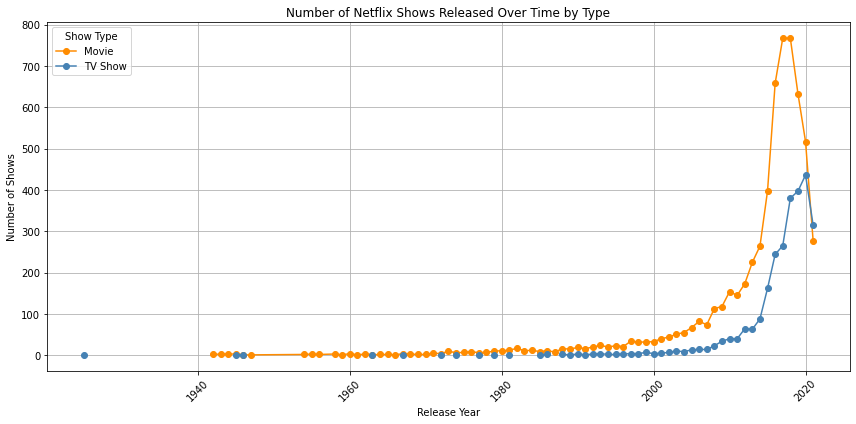

In [198]:
# Step 1: Pivot the data so 'type' becomes column headers
pivot_df = pivot_table3.pivot(index='release_year', columns='type', values='num_show_id')
pivot_df = pivot_df.sort_index()  # Sort years in ascending order

# Step 2: Plot the time series
pivot_df.plot(
    kind='line',
    figsize=(12, 6),
    marker='o',
    color={'Movie': 'darkorange', 'TV Show': 'steelblue'}
)

# Step 3: Format the plot
plt.title('Number of Netflix Shows Released Over Time by Type')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.legend(title='Show Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

based on the chart above, netflix has more focus on movies than TV shows since 1980.

## 7. Understanding what content is available in different countries.

In [199]:
pivot_table9 = netflix_data.groupby(['listed_in','country']).show_id.count().reset_index(name = 'num_show_id').sort_values(by = 'num_show_id', ascending=False)
pivot_table9.head(20)

,listed_in,country,num_show_id
1163,Documentaries,United States,249
2550,Stand-Up Comedy,United States,209
768,"Comedies, Dramas, International Movies",India,120
1640,"Dramas, International Movies",India,118
1518,"Dramas, Independent Movies, International Movies",India,108
514,"Children & Family Movies, Comedies",United States,90
1424,Dramas,United States,88
694,Comedies,United States,84
464,Children & Family Movies,United States,80
2397,Kids' TV,United States,77


In [200]:
pivot_table10 = netflix_data.groupby(['listed_in']).show_id.count().reset_index(name = 'num_show_id').sort_values(by = 'num_show_id', ascending=False)
pivot_table10 

,listed_in,num_show_id
326,"Dramas, International Movies",362
274,Documentaries,359
470,Stand-Up Comedy,334
200,"Comedies, Dramas, International Movies",274
319,"Dramas, Independent Movies, International Movies",252
...,...,...
267,"Cult Movies, Dramas, International Movies",1
268,"Cult Movies, Dramas, Music & Musicals",1
269,"Cult Movies, Dramas, Thrillers",1
272,"Cult Movies, Horror Movies, Thrillers",1


In [201]:
pivot_table9 = pivot_table9.merge(pivot_table10, on = 'listed_in', how = 'inner')


In [202]:
pivot_table9['pct_share'] = round(pivot_table9['num_show_id_x']/pivot_table9['num_show_id_y'],2)* 100


In [203]:
pivot_table9.head(20)
# from this view we can see the percentage of share of each country in each genre. For example, U.S. produced 69% of the documentaries and 64% of dramas, etc.

,listed_in,country,num_show_id_x,num_show_id_y,pct_share
0,Documentaries,United States,249,359,69.0
1,Stand-Up Comedy,United States,209,334,63.0
2,"Comedies, Dramas, International Movies",India,120,274,44.0
3,"Dramas, International Movies",India,118,362,33.0
4,"Dramas, Independent Movies, International Movies",India,108,252,43.0
5,"Children & Family Movies, Comedies",United States,90,201,45.0
6,Dramas,United States,88,138,64.0
7,Comedies,United States,84,110,76.0
8,Children & Family Movies,United States,80,215,37.0
9,Kids' TV,United States,77,220,35.0
